## I. Correlation Coefficient
## II. Simple Linea Regression

### Content 
- [1. Load the dataset](#1)

- [2.Exploratory Data Anlysis(EDA)](#2)
    - [2.1 Quick Explore the dataset](#1.1)
    - [2.2 Data Cleaning](#1.3)
        - [2.3 Missing Value](#1.3.1)
        - [2.3.2 Duplicated](#1.3.2)
        - [2.3.3 Outliter](#1.3.3)
    - [2.3 Deep Exploration of Features in the Dataset](#)
    - [2.3 Diagnostics Analytics](#2.3)
- [3. Data preprocessing and feature engineering](#4)
  
    <!-- - [3.1 Min-Max Scaling or Standardization?](#4.1) -->
    - [3.2 Encoding Categorical Variables](#4.2)
        - [3.2.1 Label Encoding](#4.2.1)
        - [3.2.2 One hot Encoding](#4.2.2)
        - [3.2.3 Multicolinearity](#4.2.3)
- [4. Data Splitting and Model Building](#5)
   - [4.1 Model Buiding](#5.2)
       - [4.1.1 Feature selection](#5.2.1)
           - [4.1.1.1 Recursive Feature Elimination (RFE)](#5.2.1.1)
- [5. Model Evaluation](#6) 


In [1]:
import pandas as pd , numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
pd.set_option('display.max_columns', None)

### I. Correlation Coefficient

In [2]:
x = np.array([1, 2,3, 4, 5.5, 6.6, 7, 8])
y = 3*x-3
z = [ -6.4 ,  -9.2 , -12.34 , -16. , -18.5, -24.8, -22.2 , -29.0 ]
k = [5, 2, 23, 50, 4, 2, 1, 45]

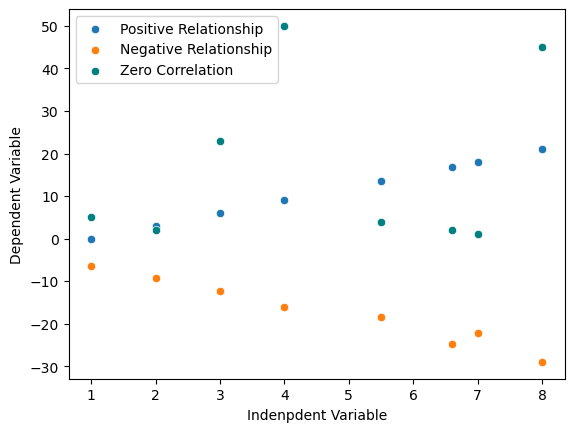

In [3]:
sns.scatterplot(x = x, y = y, label ='Positive Relationship')
sns.scatterplot(x= x, y = z, label ='Negative Relationship')
sns.scatterplot(x = x, y = k,  color = 'teal', label = 'Zero Correlation')
plt.ylabel('Dependent Variable')
plt.xlabel('Indenpdent Variable')

plt.show()

### II. Simple Linear Regression

<!-- 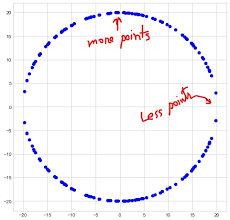 -->

- [1. Load the dataset](#1)

- [2.Exploratory Data Anlysis(EDA)](#2)
    - [2.1 Exploring the dataset](#1.1)
    - [2.2 Data Cleaning](#1.3)
        - [2.3 Missing Value](#1.3.1)
        - [2.3.2 Duplicated](#1.3.2)
        - [2.3.3 Outliter](#1.3.3)

## 1. Load the dataset
We quick exploration about our dataset look like

In [4]:
df = pd.read_csv('https://raw.githubusercontent.com/ManonYa09/Statistics_with_Python_G7/main/Dataset/4.%20WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## 2. Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### 2.1 Data Cleaning

### 2.1.1 Missing values

### Check data incorrect type

In [7]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df.dropna(inplace=True) ## drop missing values

### 2.1.2 Duplicates

In [8]:
df.duplicated().sum()

0

### Select the dataset for Simple Linear Regression

In [9]:
df = df[['MonthlyCharges', 'TotalCharges', 'tenure']]

### 2.2 Deep explore the features

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


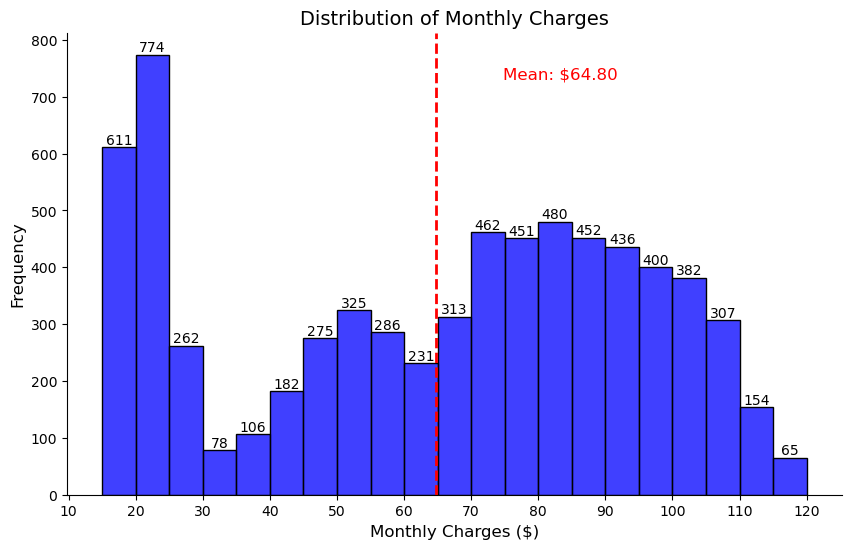

In [10]:
mean_charge = df['MonthlyCharges'].mean()
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df['MonthlyCharges'], bins=np.arange(15, 121, 5), ax = ax, color = 'b')

ax.set_xticks(np.arange(10, 130, 10))
ax.bar_label(ax.containers[0])

ax.set_xlabel('Monthly Charges ($)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.set_title('Distribution of Monthly Charges', fontsize=14)

# Add vertical line for mean
ax.axvline(df['MonthlyCharges'].mean(), color='r', linestyle='--', linewidth=2)
ax.text(mean_charge+10 , ax.get_ylim()[1] * 0.9, f'Mean: ${mean_charge:.2f}', color='r', fontsize=12)
sns.despine()
plt.show()

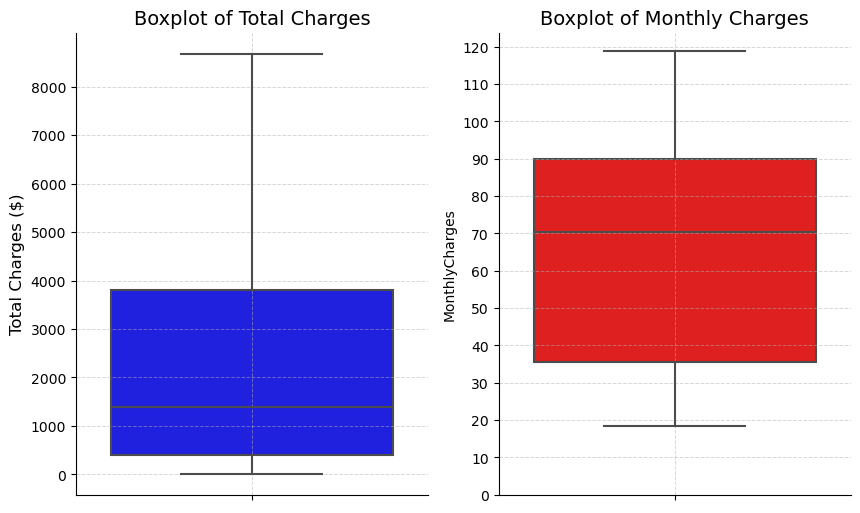

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(10, 6))

sns.boxplot(y=df['TotalCharges'], ax=ax[0], color='b')

ax[0].set_yticks(np.arange(0, 9000, 1000))
ax[0].set_ylabel('Total Charges ($)', fontsize=12)
ax[0].set_title('Boxplot of Total Charges', fontsize=14)

sns.boxplot(y=df['MonthlyCharges'], ax=ax[1], color='r')
ax[1].set_yticks(np.arange(0, 130, 10))
ax[1].set_title('Boxplot of Monthly Charges', fontsize=14)
# Add grid and customize its appearance
for i in ax:
    i.grid(alpha=0.5, linestyle='--', linewidth=0.7)
# Remove top and right spines for a cleaner look
sns.despine()

plt.show()

### 2.3 Dianostics Analysis

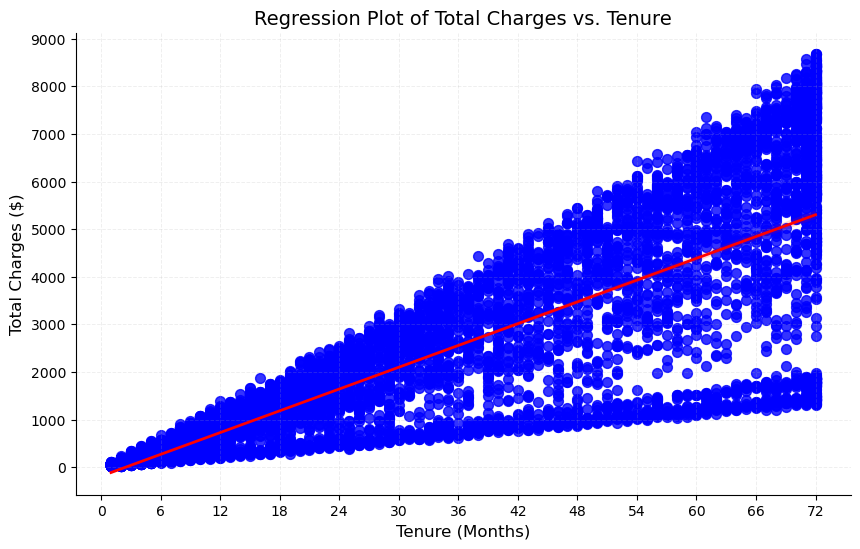

In [12]:
fig, ax = plt.subplots(figsize=(10, 6))
# Plot regression with customizations
sns.regplot(x=df['tenure'], y=df['TotalCharges'], scatter_kws={'s': 50, 'color': 'blue'}, line_kws={'color': 'red', 'linewidth': 2})
# Set ticks
ax.set_xticks(np.arange(0, 73, 6))
ax.set_yticks(np.arange(0, 10000, 1000))

# Add labels and title
ax.set_xlabel('Tenure (Months)', fontsize=12)
ax.set_ylabel('Total Charges ($)', fontsize=12)
ax.set_title('Regression Plot of Total Charges vs. Tenure', fontsize=14)

# Add grid
ax.grid(alpha=0.2, linestyle='--', linewidth=0.7)
sns.despine()
plt.show()

In [13]:
df.head()

,MonthlyCharges,TotalCharges,tenure
0,29.85,29.85,1
1,56.95,1889.50,34
2,53.85,108.15,2
3,42.30,1840.75,45
4,70.70,151.65,2


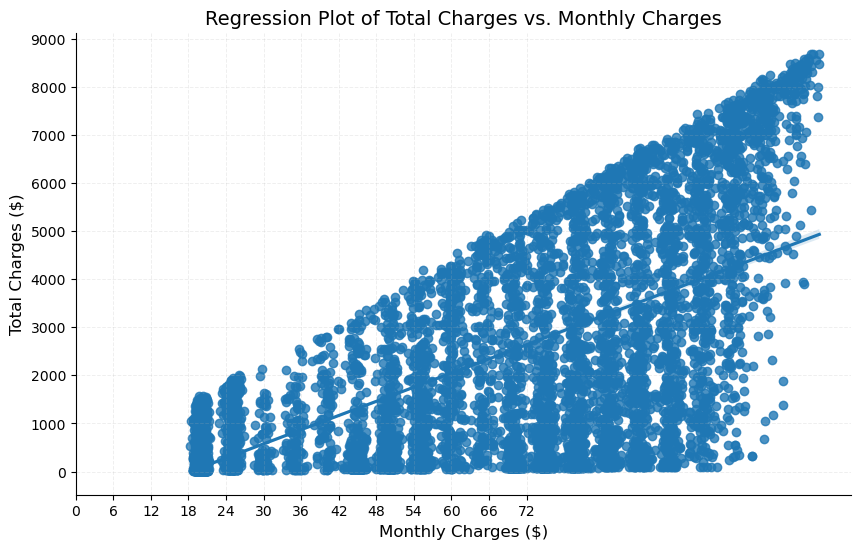

In [14]:
fig, ax = plt.subplots(figsize=(10, 6))
# Plot regression with customizations
sns.regplot(x=df['MonthlyCharges'], y=df['TotalCharges'])
# Set ticks
ax.set_xticks(np.arange(0, 73, 6))
ax.set_yticks(np.arange(0, 10000, 1000))

# Add labels and title
ax.set_xlabel('Monthly Charges ($)', fontsize=12)
ax.set_ylabel('Total Charges ($)', fontsize=12)
ax.set_title('Regression Plot of Total Charges vs. Monthly Charges', fontsize=14)

# Add grid
ax.grid(alpha=0.2, linestyle='--', linewidth=0.7)
sns.despine()
plt.show()

In [15]:
df.head()

,MonthlyCharges,TotalCharges,tenure
0,29.85,29.85,1
1,56.95,1889.50,34
2,53.85,108.15,2
3,42.30,1840.75,45
4,70.70,151.65,2


- [3. Data preprocessing and feature engineering](#4)
  
    <!-- - [3.1 Min-Max Scaling or Standardization?](#4.1) -->
    - [3.2 Encoding Categorical Variables](#4.2)
        - [3.2.1 Label Encoding](#4.2.1)
        - [3.2.2 One hot Encoding](#4.2.2)
        - [3.2.3 Multicolinearity](#4.2.3)

- [4. Data Splitting and Model Building](#5)
   - [4.1 Model Buiding](#5.2)

In [16]:

y = df[['TotalCharges']]
x = df.drop(columns = ['TotalCharges'])

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

In [18]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=12)

In [19]:
X_test

,MonthlyCharges,tenure
6226,25.75,65
3570,20.50,16
6798,70.15,13
6489,18.85,1
2819,55.20,4
...,...,...
6241,49.15,3
4734,80.00,39
2424,112.95,57
3750,79.20,12


In [21]:
Linear = LinearRegression()

In [22]:
Linear.fit(X_train, y_train)

LinearRegression()

In [23]:
Linear.score(X_train, y_train)

0.895781746936936

In [24]:
Linear.score(X_test, y_test)

0.8916924812403915

In [25]:
Linear.coef_

array([[35.5600282 , 65.80337138]])

In [26]:
Linear.intercept_

array([-2148.72426752])

In [29]:
# y_hat = -Linear.intercept_+ 35.56*monthly_charnge + 65.8033 * tenure.

In [28]:
# Scaler = StandardScaler()

In [30]:
# Scaler.fit(df)
# Scaler.transform(df)

In [31]:
import statsmodels.api as sm

X_trian_with_cont = sm.add_constant(X_train)
model_liear = sm.OLS(y_train, X_trian_with_cont).fit()


In [32]:
model_liear.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           TotalCharges   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                 2.416e+04
Date:                Wed, 14 Aug 2024   Prob (F-statistic):               0.00
Time:                        12:18:59   Log-Likelihood:                -45111.
No. Observations:                5625   AIC:                         9.023e+04
Df Residuals:                    5622   BIC:                         9.025e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2148.7243     24.595    -87.364      0.000   -2196.940   -2100.508
MonthlyCharges    35.5600      0.337    105.384      0.000      34.899      36.222
tenure            65.8034      0.412    159.722      0.000      64.996      66.611
==============================================================================
Omnibus:                       33.223   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               26.659
Skew:                           0.091   Prob(JB):                     1.63e-06
Kurtosis:                       2.716   Cond. No.                         198.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
Linear.predict(X_test)

array([[3044.1655985 ],
       [-366.88974731],
       [1201.25553865],
       ...,
       [5618.57308643],
       [1457.27042247],
       [ 200.4485754 ]])

In [34]:
Sum_error = Linear.predict(X_test)-y_test

In [35]:
Sum_error.describe()

,TotalCharges
count,1407.000000
mean,28.309099
std,729.528196
min,-1907.581621
25%,-435.732176
50%,133.409457
75%,465.055974
max,1977.625039


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


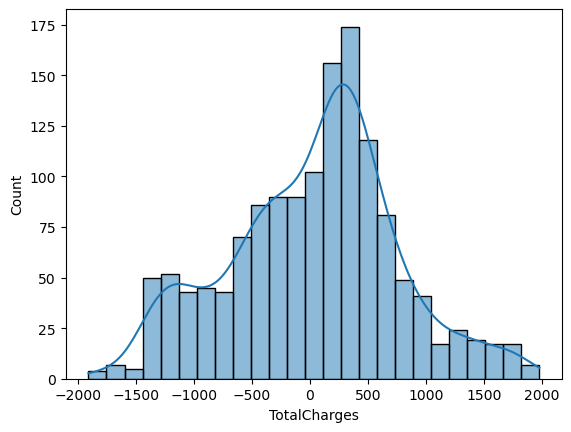

In [36]:
sns.histplot(Sum_error['TotalCharges'], kde=True)
plt.show()

In [37]:
Sum_error

,TotalCharges
6226,1389.415599
3570,-657.439747
6798,314.555539
6489,-1431.464365
2819,-143.247225
...,...
6241,-372.588767
4734,79.459472
2424,-846.426914
3750,513.420422


In [38]:
y_test

,TotalCharges
6226,1654.75
3570,290.55
6798,886.70
6489,18.85
2819,220.65
...,...
6241,169.05
4734,3182.95
2424,6465.00
3750,943.85


In [39]:
X_test

,MonthlyCharges,tenure
6226,25.75,65
3570,20.50,16
6798,70.15,13
6489,18.85,1
2819,55.20,4
...,...,...
6241,49.15,3
4734,80.00,39
2424,112.95,57
3750,79.20,12


In [40]:
y_test

,TotalCharges
6226,1654.75
3570,290.55
6798,886.70
6489,18.85
2819,220.65
...,...
6241,169.05
4734,3182.95
2424,6465.00
3750,943.85


In [117]:
X_test.loc[2203]

MonthlyCharges    104.9
tenure             72.0
Name: 2203, dtype: float64

In [118]:
y_test.loc[2203]

TotalCharges    7537.5
Name: 2203, dtype: float64

In [120]:
Linear.predict([[104.9, 72.0]])

C:\Users\Manon Ya\anaconda3\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[6324.39608896]])